<a href="https://colab.research.google.com/github/takashi4233/TensorFlowStudy/blob/master/CIFAR_10_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10を使ってTensorFlowの練習
CIFAR-10(スィーファーテン)を用いて、CNNを作成する


# ToDo

* activation関数にLeakyReLUを使う方法
* 認識率を上げる方法
* 追加で学習させて、ドラえもんを猫と認識させる方法
* さらに出力結果を追加してドラえもんとドラミを猫型ロボットと主力する方法
* 

データセット取得

In [1]:
from tensorflow.python.keras.datasets import cifar10
from keras.utils import to_categorical

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
y_train,y_test = to_categorical(y_train,10),to_categorical(y_test,10)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


必要なライブラリ読み込み

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt

## 学習モデル作成（ベース）

畳み込み4層とDense（全結合層）を2層の計6層のネットワークモデル

In [0]:
base_model = Sequential([
                    Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(units=10,activation='softmax')  
])

ベース学習モデルコンパイル

In [0]:
base_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 学習

### バッチサイズ
バッチサイズは、2のn乗が慣例。データセットの件数が数百件であれば32,64。数万件であれば、1024,2048を使うほうが良い

### エポック数
学習回数。この学習回数は、損失関数の値がほぼ収束するまで実行する。完全に収束してしまうと、過学習のリスクがあるため。


### メモ
当初エポック数を100で実行していたが、50回以降はValidationデータ側で大きな差が出ないため、学習時間を短縮させるためにも50に変更した。


**再度学習する場合は、compileからやり直さないと、追加学習になってしまう・・・・。**

*参考URL*

https://qiita.com/kenta1984/items/bad75a37d552510e4682

In [43]:
# Epoch回数
epochs = 50
# バッチサイズ
batch_size = 2048
# 学習
base_history = base_model.fit(x_train, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
19/19 [==============================] - 4s 225ms/step - loss: 1.1977 - accuracy: 0.5741 - val_loss: 1.2552 - val_accuracy: 0.5984
Epoch 2/50
19/19 [==============================] - 4s 220ms/step - loss: 1.1554 - accuracy: 0.5915 - val_loss: 1.2126 - val_accuracy: 0.6061
Epoch 3/50
19/19 [==============================] - 4s 222ms/step - loss: 1.1248 - accuracy: 0.6010 - val_loss: 1.1761 - val_accuracy: 0.6273
Epoch 4/50
19/19 [==============================] - 4s 223ms/step - loss: 1.0372 - accuracy: 0.6353 - val_loss: 1.1340 - val_accuracy: 0.6366
Epoch 5/50
19/19 [==============================] - 4s 222ms/step - loss: 1.0228 - accuracy: 0.6430 - val_loss: 1.1303 - val_accuracy: 0.6374
Epoch 6/50
19/19 [==============================] - 4s 221ms/step - loss: 0.9732 - accuracy: 0.6595 - val_loss: 1.0618 - val_accuracy: 0.6581
Epoch 7/50
19/19 [==============================] - 4s 221ms/step - loss: 0.9151 - accuracy: 0.6811 - val_loss: 1.0679 - val_accuracy: 0.6342
Epoch 

学習結果描画

## 初期値

4層のCNN + 2層のDense層が初期値


```
model = Sequential([
                    Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(units=10,activation='softmax')  
])```





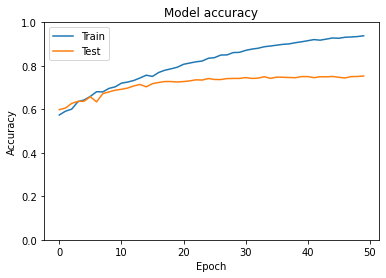

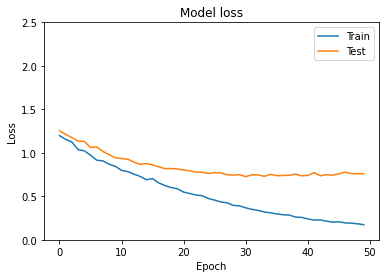

In [46]:
# Plot training & validation accuracy values
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylim(0,1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylim(0,2.5)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 改良版モデル





---
BN層（Batch Normalization）を追加してみる


*参考URL*
https://deepage.net/deep_learning/2016/10/26/batch_normalization.html

In [74]:
model_BN = Sequential([
                    Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    BatchNormalization(),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    BatchNormalization(),
                    Dropout(0.25),
                    MaxPool2D(pool_size=(2,2)),

                    Flatten(),
                    Dense(512,activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(units=10,activation='softmax')  
])

model_BN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Epoch回数
epochs = 50
# バッチサイズ
batch_size = 2048
# 学習
history_BN = model_BN.fit(x_train, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
19/19 [==============================] - 5s 247ms/step - loss: 2.1850 - accuracy: 0.3600 - val_loss: 2.3553 - val_accuracy: 0.1311
Epoch 2/50
19/19 [==============================] - 5s 238ms/step - loss: 1.4976 - accuracy: 0.4939 - val_loss: 2.8351 - val_accuracy: 0.0995
Epoch 3/50
19/19 [==============================] - 4s 237ms/step - loss: 1.2636 - accuracy: 0.5621 - val_loss: 3.4042 - val_accuracy: 0.0995
Epoch 4/50
19/19 [==============================] - 5s 238ms/step - loss: 1.1066 - accuracy: 0.6136 - val_loss: 3.9813 - val_accuracy: 0.0996
Epoch 5/50
19/19 [==============================] - 5s 239ms/step - loss: 0.9825 - accuracy: 0.6569 - val_loss: 4.6536 - val_accuracy: 0.0995
Epoch 6/50
19/19 [==============================] - 5s 239ms/step - loss: 0.9059 - accuracy: 0.6807 - val_loss: 4.9471 - val_accuracy: 0.0998
Epoch 7/50
19/19 [==============================] - 5s 240ms/step - loss: 0.8155 - accuracy: 0.7143 - val_loss: 5.7433 - val_accuracy: 0.0996
Epoch 

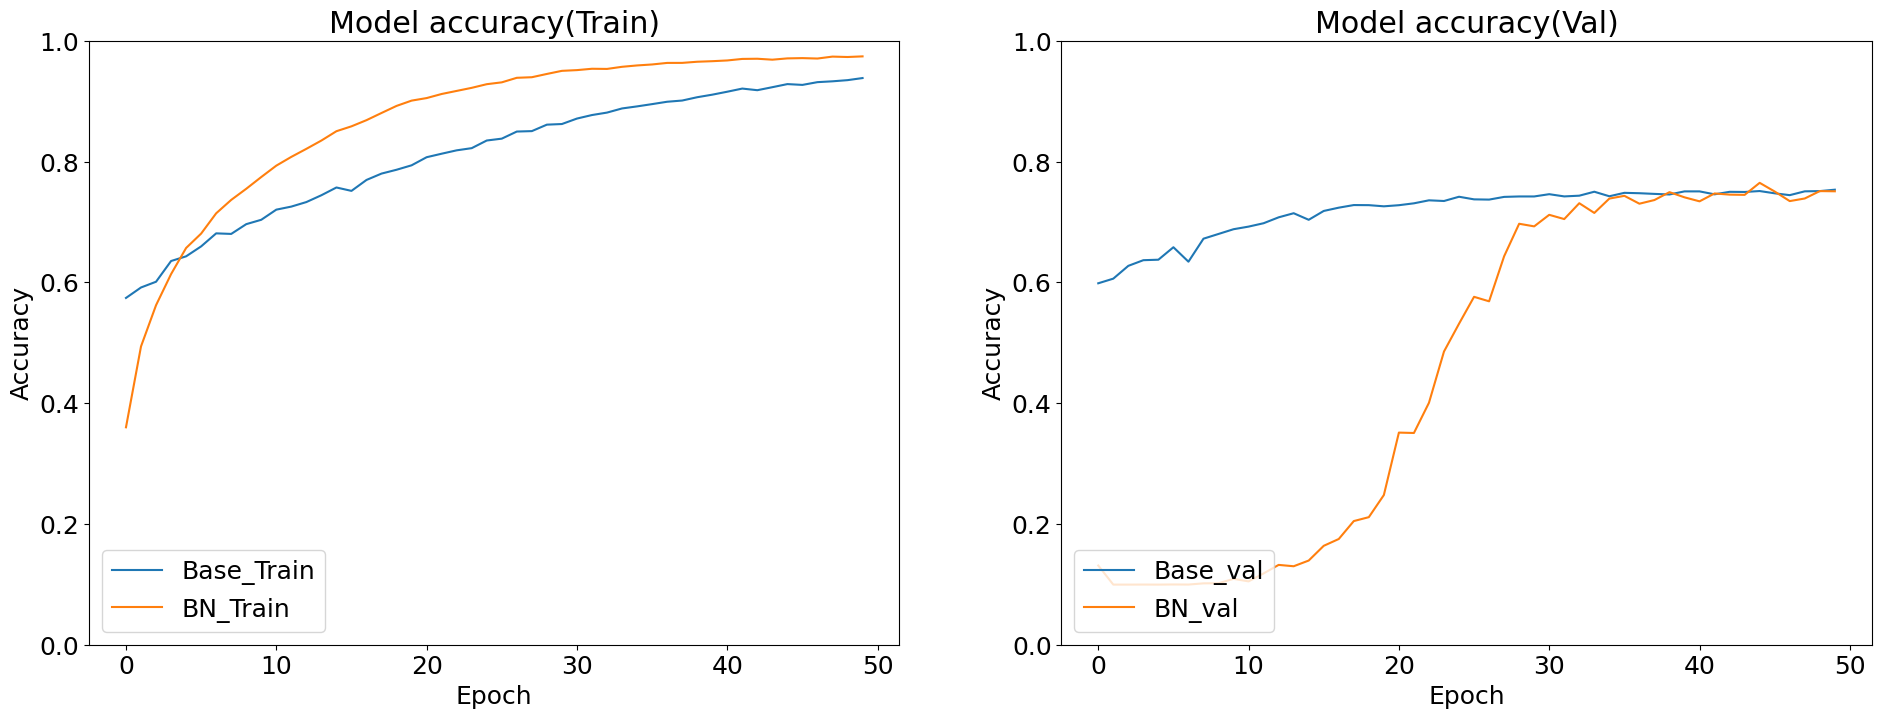

In [75]:
# Batch Normalizationを追加した結果
title = "BN"
history =  history_BN


plt.figure(figsize=(23,8),dpi=100)
plt.rcParams["font.size"] = 18

plt.subplot(1,2,1)
# Plot training & validation accuracy values
plt.plot(base_history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy(Train)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0,1.0)
plt.legend(['Base_Train',f'{title}_Train'], loc='lower left')

plt.subplot(1,2,2)
plt.plot(base_history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy(Val)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0,1.0)
plt.legend(['Base_val', f'{title}_val'], loc='lower left')
plt.show()

---
Global Average Poolingを追加してみる


*参考URL*

https://qiita.com/yu4u/items/7e93c454c9410c4b5427


学習データに細工をしてみる


```
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
```


*参考URL*

https://deepage.net/deep_learning/2016/10/26/batch_normalization.html


---
ここより下はまだ未検証
---

---
畳み込み層を追加してみる

In [25]:
model = Sequential([
                    Conv2D(filters=32,input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.15),
                    MaxPool2D(pool_size=(2,2)),

                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.40),
                    MaxPool2D(pool_size=(2,2)),

                    # 追加
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.50),
                    MaxPool2D(pool_size=(2,2)),

                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
                    Dropout(0.75),
                    MaxPool2D(pool_size=(2,2)),

                    Flatten(),
                    Dense(512,activation='relu'),
                    Dropout(0.5),
                    Dense(units=10,activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Epoch回数
epochs = 100
# バッチサイズ
batch_size = 2048
# 学習
history = model.fit(x_train, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
19/19 [==============================] - 5s 260ms/step - loss: 2.2309 - accuracy: 0.1390 - val_loss: 2.2211 - val_accuracy: 0.2301
Epoch 2/100
19/19 [==============================] - 5s 249ms/step - loss: 1.9888 - accuracy: 0.2382 - val_loss: 2.1397 - val_accuracy: 0.2566
Epoch 3/100
17/19 [=========================>....] - ETA: 0s - loss: 1.8241 - accuracy: 0.3004

KeyboardInterrupt: ignored

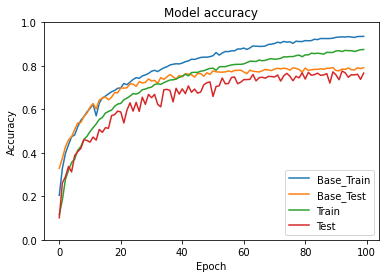

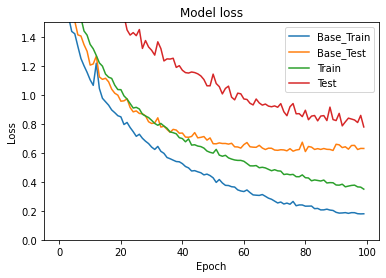

In [17]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(base_history.history['accuracy'])
plt.plot(base_history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylim(0,1.0)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base_Train', 'Base_Test','Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylim(0,1.5)
plt.xlabel('Epoch')
plt.legend(['Base_Train', 'Base_Test','Train', 'Test'], loc='upper right')
plt.show()

評価

In [0]:
model.evaluate(x_test,y_test)

テストデータ検証

In [0]:
url = "https://pbs.twimg.com/media/CZpyQOFUUAEbAa4.jpg"

fetch_img_ary(url)

In [0]:
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from tensorflow.python.keras.applications.vgg16 import preprocess_input
import numpy as np
def fetch_img_ary(url,img_name="tmp.jpg"):
  print (url)
  !curl -o {img_name} {url}
  img_show = load_img(img_name,target_size=(256,256))
  img = load_img(img_name,target_size=(32,32))
  img2 = img_to_array(img)
  img2 = preprocess_input(img2)
  arr_input = np.stack([img2])
  p = model.predict(arr_input)
  CIFAR10_LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 
  print (f"この画像は{ CIFAR10_LABELS[np.argmax(p)] }です.")
  display(img_show)

In [0]:
!ls